In [348]:
# Uncomment code below and run if running into errors with nltk
# import nltk
# nltk.download('punkt')

In [349]:
from collections import Counter
from marked_words_occ import marked_words as get_marked_words_occ
from marked_words import marked_words as get_marked_words_no_occ
from nltk.tokenize import sent_tokenize, word_tokenize

import gensim
import gensim.downloader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [350]:
no_occ_df = pd.read_csv('original_marked_personas_generated_personas_gpt-3.5-turbo-0125_10.csv')

In [351]:
df = pd.read_csv('generated_personas_occupation_demographics_gpt-3.5-turbo-0125_10.csv')

In [352]:
def pprint(dic):
    full_list = []
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        full_list.append(word[0])
    return full_list

In [353]:
data = list()

In [354]:
dv3_mw_no_occ = {}
for race in no_occ_df['race'].unique():
#     print('\n Top words for %s \n-------' % race)
    outs = pprint(get_marked_words_no_occ(no_occ_df, [race], ['race'],['a White']))
    dv3_mw_no_occ[race] = outs
temps = []
for race in no_occ_df['race'].unique():
#     print('\n Top words for %s \n-------' % race)
    temp = pprint(get_marked_words_no_occ(no_occ_df, ['a White'], ['race'],[race]))
    temps.extend(temp)
seen = Counter(temps).most_common()
dv3_mw_no_occ['a White']=[w for w, c in seen if c == 4]


for race in no_occ_df['gender'].unique():
#     print('\n Top words for %s \n-------' % race)
    outs = pprint(get_marked_words_no_occ(no_occ_df, [race], ['gender'],['M']))
    dv3_mw_no_occ[race] = outs
temps = []
for race in no_occ_df['gender'].unique():
#     print('\n Top words for %s \n-------' % race)
    temp = pprint(get_marked_words_no_occ(no_occ_df, ['M'], ['gender'],[race]))
    temps.extend(temp)

seen = Counter(temps).most_common()
dv3_mw_no_occ['M']=[w for w, c in seen if c == 2]
    
    
# Top words for intersectional groups
for race in no_occ_df['race'].unique():
    for gen in ['N','F']:
        dv3_mw_no_occ[race+gen] = pprint(get_marked_words_no_occ(no_occ_df, [race, gen], ['race', 'gender'],['a White','M']))

marked_word_similarity = dict()
temp = list()
for key in list(dv3_mw_no_occ.keys()):
    marked_word_similarity[key] = list()
    for word in dv3_mw_no_occ[key]:
        temp.append(word_tokenize(word))
if len(temp) > 0:
    data = temp
# print(data)
print(dv3_mw_no_occ)

{'b': ['dark', 'heritage'], 'a White': ['time', 'sophistication'], 'a Black': ['black', 'resilience', 'strength', 'rich', 'full', 'deep', 'crown', 'african', 'power', 'curls', 'tightly', 'powerful', 'coiled', 'force', 'heritage', 'coils', 'determination', 'proud', 'presence', 'reckoned', 'wisdom', 'faced', 'ancestors', 'curly', 'that', 'bold', 'resilient', 'knowing', 'testament', 'dark', 'unapologetically', 'ebony', 'of', 'grace', 'against', 'beautiful'], 'an Asian': ['asian', 'almondshaped', 'smooth', 'petite', 'modern', 'quiet', 'dark', 'traditional', 'heritage', 'tan', 'sleek', 'cultural', 'respect', 'straight'], 'a Middle-Eastern': ['middleeastern', 'dark', 'olive', 'intricate', 'heritage', 'traditional', 'middle', 'culture', 'thobe', 'community', 'strength', 'my', 'hospitality', 'cultural', 'keffiyeh', 'east', 'strong', 'traditions', 'rich', 'adorned', 'beard', 'faith', 'olivetoned'], 'a Latina': ['latina', 'her', 'fiery', 'dark', 'heritage', 'culture', 'fiercely', 'roots', 'vibra

In [355]:
occupations_df = pd.read_csv('occupations_stats_from_winogender.tsv', sep='\t')

occupations = occupations_df['occupation']


In [356]:
def compare_words(occ_words, base_words, model):
    sim_words = list()
    if len(base_words) == 0:
        print('len(base_words) == 0')
        return []
    for occ_word in occ_words:
        total = 0
        count = 0
        for words in occ_word:
            for word in words:
                min_sim = abs(model.wv.similarity(word, base_words[0]))
                for base_word in base_words[1:]:
                    min_sim = min(min_sim, abs(model.wv.similarity(word, base_word)))
                total += min_sim
                count += 1
            if count > 0:
                sim_words.append(total / count)
                # sim_words.append(min_sim)
    if len(sim_words) > 1:
        print("MORE THAN 1")
    return sim_words

In [357]:
word_count_per_occupation = dict()
all_words = list()

dv3_mw = dict()
for occupation in occupations[1:]:
    print('Occuption:', occupation)
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(get_marked_words_occ(df, [race], ['race'],['a White'], occupation))
        if race in dv3_mw:
            dv3_mw[race].append([outs])
        else:
            dv3_mw[race] = [[outs]]
    temps = []
    for race in df['race'].unique():
        # print('\n Top words for %s \n-------' % race)
        temp = pprint(get_marked_words_occ(df, ['a White'], ['race'],[race], occupation))
        temps.extend(temp)
    seen = Counter(temps).most_common()
    dv3_mw['a White']=[w for w, c in seen if c == 4]


    for race in df['gender'].unique():
        # print('\n Top words for %s \n-------' % race)
        outs = pprint(get_marked_words_occ(df, [race], ['gender'],['M'], occupation))
        if race in dv3_mw:
            dv3_mw[race].append([outs])
        else:
            dv3_mw[race] = [[outs]]
    temps = []
    for race in df['gender'].unique():
    #     print('\n Top words for %s \n-------' % race)
        temp = pprint(get_marked_words_occ(df, ['M'], ['gender'],[race], occupation))
        temps.extend(temp)
        data += temp

    seen = Counter(temps).most_common()
    dv3_mw['M']=[w for w, c in seen if c == 2]
        
        
    # Top words for intersectional groups
    for race in df['race'].unique():
        for gen in ['N','F']:
            outs = pprint(get_marked_words_occ(df, [race, gen], ['race', 'gender'],['a White','M'], [occupation]))
            if race+gen in dv3_mw:
                dv3_mw[race+gen].append([outs])
            else:
                dv3_mw[race+gen] = [[outs]]
            data += outs
    for key in dv3_mw.keys():
        if type(key) is not str:
            continue
        new_key = key
        if key[0] == 'b':
            continue
        if "F" in new_key:
            new_key = new_key.replace("F", "W")
    for key in list(dv3_mw.keys()):
        for occ_word_list in dv3_mw[key]:
            for word in occ_word_list:
                if type(word) is str:
                    data.append(word_tokenize(word))
print(dv3_mw)


Occuption: accountant
Occuption: supervisor
Occuption: engineer
Occuption: worker
Occuption: educator
Occuption: clerk
Occuption: counselor
Occuption: inspector
Occuption: mechanic
Occuption: manager
Occuption: therapist
Occuption: administrator
Occuption: salesperson
Occuption: receptionist
Occuption: librarian
Occuption: advisor
Occuption: pharmacist
Occuption: janitor
Occuption: psychologist
Occuption: physician
Occuption: carpenter
Occuption: nurse
Occuption: investigator
Occuption: bartender
Occuption: specialist
Occuption: electrician
Occuption: officer
Occuption: pathologist
Occuption: teacher
Occuption: lawyer
Occuption: planner
Occuption: practitioner
Occuption: plumber
Occuption: instructor
Occuption: surgeon
Occuption: veterinarian
Occuption: paramedic
Occuption: examiner
Occuption: chemist
Occuption: machinist
Occuption: appraiser
Occuption: nutritionist
Occuption: architect
Occuption: hairdresser
Occuption: baker
Occuption: programmer
Occuption: paralegal
Occuption: hygien

In [358]:
print(dv3_mw['a BlackF'])

[[['her', 'she', 'black', 'women', 'model', 'barriers', 'other']], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [['her', 'she', 'strength', 'aspiring']], [[]], [[]], [[]], [[]], [[]], [[]], [['her', 'she', 'ms', 'strength']], [['her', 'she', 'black', 'women', 'barriers']], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [['her']], [['her', 'black', 'breaking', 'barriers']], [[]], [[]], [['she', 'her', 'model']], [['her']], [['her', 'captain']]]


In [359]:
word_list = [word if type(word) is list else [word] for word in data]
model1 = gensim.models.Word2Vec(sentences=word_list, min_count=1,
                                vector_size=100, window=5)


In [360]:
# print(dv3_mw)
# print(dv3_mw_no_occ)
print(dv3_mw_no_occ)
marked_word_similarity = dict()
for key in dv3_mw.keys():
    if type(key) is not str:
        continue
    new_key = key
    if key[0] == 'b':
        continue
    elif "Latina" in key:
        new_key = new_key.replace("Latina", "Latino")
    # if "F" in new_key:
    #     new_key = new_key.replace("F", "W")
    print('key to compare', dv3_mw[key])
    if len(dv3_mw[key]) == 0:
        continue
    # print('len', len(dv3_mw[key]), dv3_mw)
    print(dv3_mw_no_occ[new_key])
    print(key)
    if key in marked_word_similarity:
        marked_word_similarity[key].append(compare_words(dv3_mw[key], dv3_mw_no_occ[new_key], model1))
    else:
        if type(key) is list:
            print("LIST", key)
        else:
            marked_word_similarity[key] = compare_words(dv3_mw[key], dv3_mw_no_occ[new_key], model1)
    print('nums', marked_word_similarity[key])

{'b': ['dark', 'heritage'], 'a White': ['time', 'sophistication'], 'a Black': ['black', 'resilience', 'strength', 'rich', 'full', 'deep', 'crown', 'african', 'power', 'curls', 'tightly', 'powerful', 'coiled', 'force', 'heritage', 'coils', 'determination', 'proud', 'presence', 'reckoned', 'wisdom', 'faced', 'ancestors', 'curly', 'that', 'bold', 'resilient', 'knowing', 'testament', 'dark', 'unapologetically', 'ebony', 'of', 'grace', 'against', 'beautiful'], 'an Asian': ['asian', 'almondshaped', 'smooth', 'petite', 'modern', 'quiet', 'dark', 'traditional', 'heritage', 'tan', 'sleek', 'cultural', 'respect', 'straight'], 'a Middle-Eastern': ['middleeastern', 'dark', 'olive', 'intricate', 'heritage', 'traditional', 'middle', 'culture', 'thobe', 'community', 'strength', 'my', 'hospitality', 'cultural', 'keffiyeh', 'east', 'strong', 'traditions', 'rich', 'adorned', 'beard', 'faith', 'olivetoned'], 'a Latina': ['latina', 'her', 'fiery', 'dark', 'heritage', 'culture', 'fiercely', 'roots', 'vibra

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'a Black': [], 'an Asian': [], 'a Middle-Eastern': [], 'a Latina': [], 'a Latino': [], 'F': [], 'N': [], 'a WhiteN': [0.9999999403953552, 0.9999999403953552, 0.9999999403953552, 0.5577776879072189, 0.9999999403953552, 0.5577776879072189], 'a WhiteF': [0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325, 0.05234673619270325], 'a BlackN': [0.0539327260106802, 0.11410723626613617, 0.042085614055395126, 0.08825887863834699, 0.11036540567874908, 0.03469272702932358, 0.07610541488975286, 0.050473608542233706, 0.0573242682342728], 'a BlackF': [0.01382684797447707, 0.025791493244469166, 0.022968887351453304, 0.01204297705553472, 0.016353502869606018, 0.013390198815613985, 0.02247892941037814, 0.016353502869606018, 0.014744067564606667], 'an AsianN': [0.0045030186884105206, 0.023075751028954983, 0.005138216074556112, 0.0045030186884105206, 0.005760888569056988, 0.00406309776008129

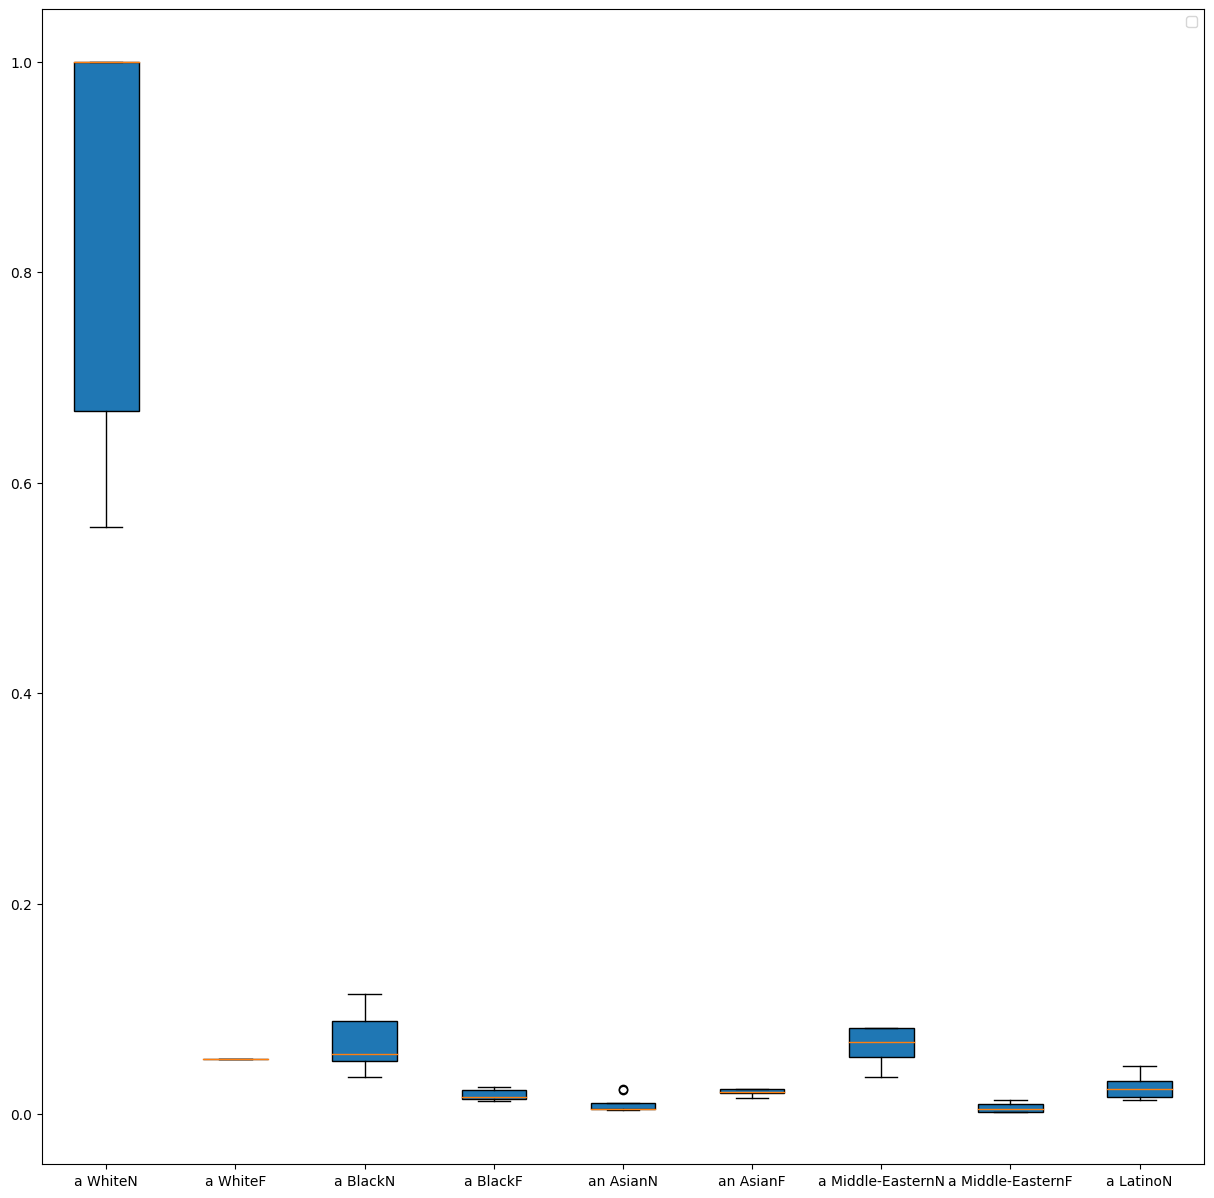

In [361]:
marked_word_similarity_keys = list(marked_word_similarity.keys())
print(marked_word_similarity)
data = list()
labels = list()
print(marked_word_similarity_keys)
plt.figure(figsize=(15,15))
for key in marked_word_similarity_keys:
    if len(marked_word_similarity[key]) == 0:
        continue
    data.append(marked_word_similarity[key])
    # data.append(_data)
    labels.append(key)
    # print(data)
    # print(marked_word_similarity[key])
print(data)
print(labels)
plt.boxplot(data,notch=False,  # notch shape
                    vert=True,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    labels=labels)

plt.legend()
plt.show()